In [20]:
import itertools
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("teleCust1000t.csv")
df.head(9)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3


In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CF233D2E8>]],
      dtype=object)

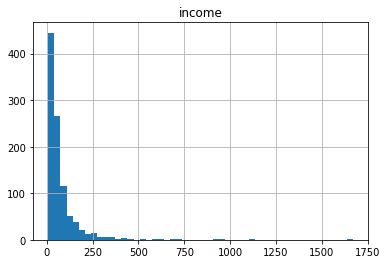

In [4]:
df.hist(column='income',bins=50)

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

In [7]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [8]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601, ...,  0.96655883,
        -0.23065004,  0.45813963],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ...,  0.96655883,
        -0.92747794,  1.35119935],
       [ 1.19883553,  1.61477311,  0.58283046, ...,  0.96655883,
        -0.92747794,  0.45813963],
       [ 1.19883553,  0.67796676, -0.45281689, ...,  0.96655883,
         0.46617787, -0.43492008]])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=4,test_size=0.2)
print("Test shape ",X_test.shape,Y_test.shape)
print("Train shape ",X_train.shape,Y_train.shape)

Test shape  (200, 12) (200,)
Train shape  (800, 12) (800,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
K=4
neigh=KNeighborsClassifier(n_neighbors=4).fit(X_train,Y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [12]:
yhat=neigh.predict(X_test)
yhat

array([3, 1, 1, 2, 4, 3, 3, 1, 3, 4, 4, 2, 4, 1, 3, 3, 4, 2, 3, 4, 2, 1,
       1, 4, 4, 3, 3, 1, 4, 2, 1, 1, 4, 4, 3, 3, 3, 2, 3, 3, 1, 4, 1, 1,
       2, 4, 3, 3, 2, 1, 2, 3, 2, 3, 4, 3, 4, 3, 1, 4, 1, 3, 2, 3, 3, 1,
       3, 3, 2, 4, 3, 1, 4, 3, 1, 4, 2, 4, 2, 3, 1, 3, 2, 1, 1, 2, 3, 2,
       1, 3, 3, 2, 3, 1, 4, 1, 4, 1, 1, 3, 3, 1, 3, 3, 4, 4, 2, 1, 2, 4,
       4, 1, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 3, 3, 4, 2, 3, 1, 1, 2, 1,
       3, 1, 2, 2, 2, 2, 1, 3, 1, 3, 2, 3, 1, 4, 2, 2, 2, 2, 4, 4, 4, 2,
       2, 3, 1, 3, 3, 2, 3, 1, 1, 3, 1, 4, 4, 1, 3, 2, 1, 3, 4, 2, 4, 2,
       2, 4, 4, 1, 1, 2, 1, 1, 3, 1, 3, 1, 4, 4, 3, 3, 1, 2, 3, 1, 4, 3,
       2, 3], dtype=int64)

In [13]:
from sklearn import metrics

In [14]:
print("Train accuracy ",metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print("Test accuracy ",metrics.accuracy_score(Y_test,yhat))

Train accuracy  0.82875
Test accuracy  0.735


In [16]:
ks=10
mean_acc=np.zeros((ks))
std_acc=np.zeros((ks))
Confussion_metrics=[]

for n in range(1,ks):
    neigh=KNeighborsClassifier(n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(Y_train,neigh.predict(X_train))
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape)
mean_acc

array([1.     , 0.84625, 0.85625, 0.82875, 0.8425 , 0.8125 , 0.82625,
       0.82875, 0.825  , 0.     ])

ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

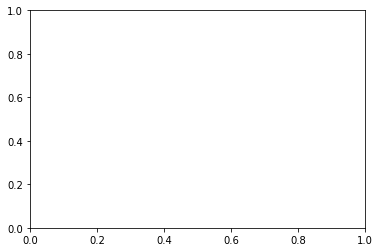

In [25]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [26]:
print("Best accuracy was ",mean_acc.max()," k=",mean_acc.argmax()+1)

Best accuracy was  1.0  k= 1
